In [1]:
!which python

/home/jah/miniconda3/envs/eemp2020/bin/python


In [140]:
# NUMPY / PANDAS
import numpy as np
import pandas as pd

# SCI-KIT LEARN
import sklearn
from sklearn.model_selection import (GroupKFold, GroupShuffleSplit, cross_validate, 
                                       RandomizedSearchCV,GridSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import log_loss, roc_curve, auc

#PDPbox
from pdpbox import pdp

# MATPLOTLIB
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# OTHER
from itertools import product
import copy
import graphviz

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [141]:
df = pd.read_csv("simulated_TECHCO_data.csv")

In [9]:
df.head()

,time,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,emp_id,turnover
0,1,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
1,2,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
2,3,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
3,4,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
4,5,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed


In [10]:
df.time = df.time.astype(int)
df.is_male = df.is_male.astype(int)

In [11]:
df.set_index(['emp_id','time'],drop=False,inplace=True)

In [19]:
df.head()
df.describe()

,time,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,emp_id
count,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000
mean,17.046529,4.496400,4.373999,4.650615,75.583604,15.344276,0.833396,59.186507,0.567804,599.649454
std,10.320377,0.435643,3.905698,4.472608,9.196516,7.919007,0.762817,35.286223,0.495388,340.873215
min,1.000000,2.688673,-5.000000,-7.000000,49.354540,2.000000,0.000000,1.250000,0.000000,1.000000
25%,8.000000,4.263266,1.000000,1.000000,68.548850,9.000000,0.191342,27.132500,0.000000,311.000000
50%,16.000000,4.578397,4.000000,4.000000,77.009510,11.000000,0.589657,49.118420,1.000000,603.000000
75%,26.000000,4.829628,8.000000,8.000000,82.778083,24.000000,1.316585,98.816540,1.000000,890.000000
max,39.000000,5.110679,12.000000,17.000000,97.357410,28.000000,3.200019,100.000000,1.000000,1191.000000


In [14]:
df.loc[df['turnover']=='Stayed', 'turnover'] = '0 Stayed'
df.loc[df['turnover']=='Left', 'turnover'] = '1 Left'
df.turnover
#y = df.turnover

emp_id  time
1       1       0 Stayed
        2       0 Stayed
        3       0 Stayed
        4       0 Stayed
        5       0 Stayed
                  ...   
1191    34      0 Stayed
        35      0 Stayed
        36      0 Stayed
        37      0 Stayed
        38      0 Stayed
Name: turnover, Length: 34452, dtype: object

In [15]:
X = df.drop(['turnover'],axis=1)
cols = ["time","training_score","avg_literacy","is_male","logical_score","verbal_score","location_age","distance","similar_language"]
X = X[cols]

In [16]:
train_inds, test_inds = next(GroupShuffleSplit(test_size=.3,random_state=111).split(X,y,groups=df.emp_id))

In [17]:
X_train, X_test = X.iloc[train_inds], X.iloc[test_inds]
y_train, y_test = y.iloc[train_inds], y.iloc[test_inds]
employee_train = df.emp_id.iloc[train_inds]

In [18]:
folds = list(GroupKFold(n_splits=10).split(X_train,y_train,employee_train))

In [64]:
df_small = df[df.time == 2].drop(columns="time")

In [65]:
df_small.describe()

,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,emp_id
count,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,4.396676,4.465430,4.650927,75.685801,15.258010,0.817418,59.563997,0.566610,595.596965
std,0.541748,3.926442,4.438372,9.267688,7.933641,0.751528,35.323193,0.495752,344.228100
min,2.688673,-5.000000,-7.000000,49.354540,2.000000,0.000000,1.250000,0.000000,1.000000
25%,4.181925,1.000000,1.000000,68.609995,9.000000,0.199354,27.160832,0.000000,297.250000
50%,4.525831,4.000000,4.000000,77.113750,11.000000,0.580076,54.749995,1.000000,595.500000
75%,4.810758,8.000000,7.000000,82.838060,24.000000,1.257965,98.817845,1.000000,892.750000
max,5.110679,12.000000,17.000000,96.931760,28.000000,3.200019,100.000000,1.000000,1191.000000


In [57]:
df_small.head()

,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,emp_id,turnover
0,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
39,4.355449,0,8,93.72386,3,0.234684,96.08640,1,2,Stayed
73,4.416302,3,2,66.49519,6,0.673065,100.00000,1,3,Stayed
110,4.995522,11,3,87.05980,13,0.232718,93.20673,1,4,Stayed
144,4.531571,1,0,77.78675,24,2.333878,23.03190,0,5,Stayed


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df_small.drop(columns="turnover")

In [66]:
df_small.loc[df['turnover']=='Stayed', 'turnover'] = 0
df_small.loc[df['turnover']=='Left', 'turnover'] = 1
df_small.turnover

1        0
40       0
74       0
111      0
145      0
        ..
34307    0
34341    0
34380    0
34409    0
34415    0
Name: turnover, Length: 1186, dtype: object

In [67]:
y = df_small.turnover

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=181)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'max_depth': np.arange(1,100)}
clf_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5).fit(X,y)

In [43]:
clf_cv.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [45]:
list(X_train.columns)

['training_score',
 'logical_score',
 'verbal_score',
 'avg_literacy',
 'location_age',
 'distance',
 'similar_language',
 'is_male',
 'emp_id']

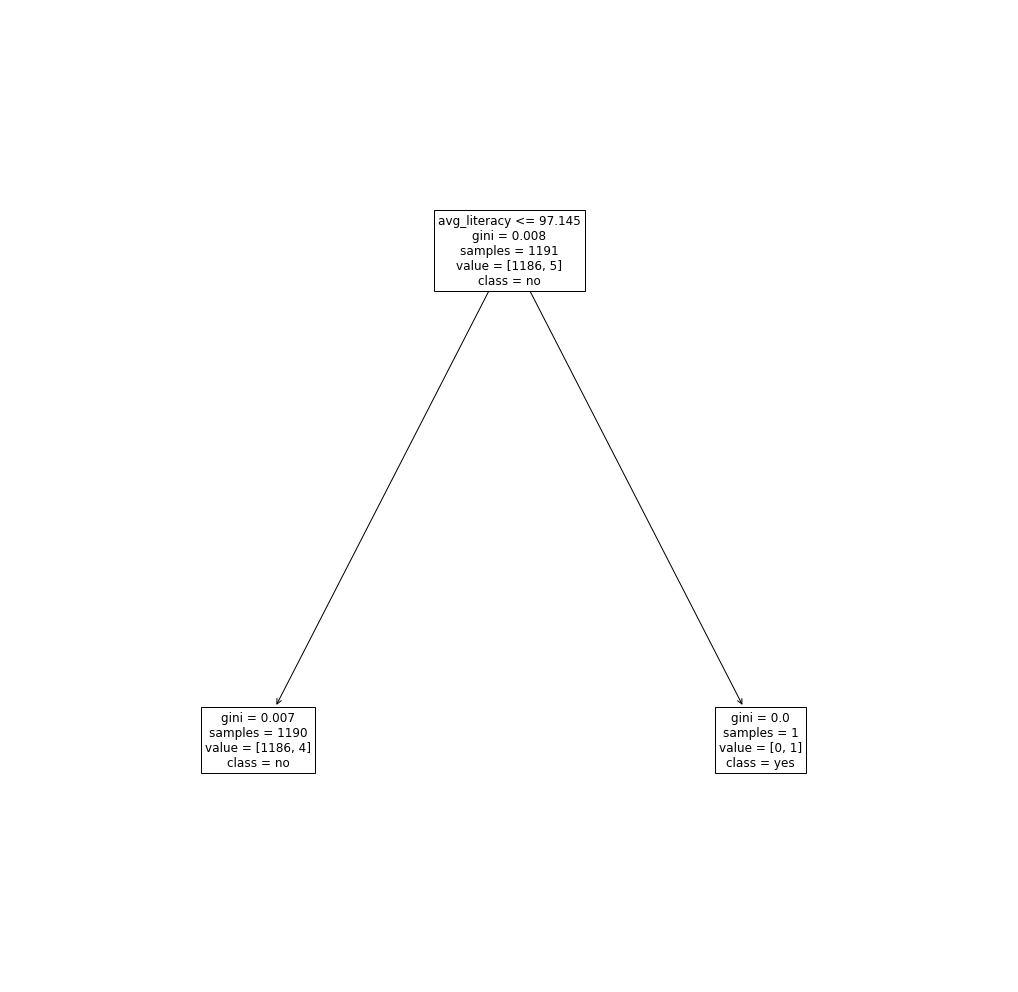

In [47]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(18, 18))
tree.plot_tree(clf_cv.best_estimator_, feature_names=list(X_train.columns), fontsize=12,
              class_names=['no', 'yes']);

In [48]:
clf_cv.best_score_

0.9958018353785029

In [53]:
y.nunique()

2

In [68]:
np.mean(y)

0.006745362563237774

In [70]:
df.groupby('turnover').describe()

time                                                     \
            count       mean        std  min   25%   50%   75%   max   
turnover                                                               
Left        494.0  19.299595  11.240291  1.0  6.25  20.0  30.0  39.0   
Stayed    33958.0  17.013752  10.302934  1.0  8.00  16.0  26.0  39.0   

         training_score            ... is_male        emp_id              \
                  count      mean  ...     75%  max    count        mean   
turnover                           ...                                     
Left              494.0  4.210585  ...     1.0  1.0    494.0  594.281377   
Stayed          33958.0  4.500558  ...     1.0  1.0  33958.0  599.727546   

                                                         
                 std  min     25%    50%    75%     max  
turnover                                                 
Left      355.624651  6.0  281.25  586.5  925.5  1190.0  
Stayed    340.658742  1.0  311.00  604.0  890.0  1191.0  

[2 rows x 80 columns]

In [71]:
494/33958

0.014547382060192002

In [80]:
df[df.time==38].groupby('turnover').describe()

time                                          training_score  \
          count  mean  std   min   25%   50%   75%   max          count   
turnover                                                                  
Left        2.0  38.0  0.0  38.0  38.0  38.0  38.0  38.0            2.0   
Stayed    141.0  38.0  0.0  38.0  38.0  38.0  38.0  38.0          141.0   

                    ... is_male      emp_id                                 \
              mean  ...     75%  max  count        mean         std    min   
turnover            ...                                                      
Left      4.319357  ...    0.75  1.0    2.0  835.000000  397.394011  554.0   
Stayed    4.519943  ...    1.00  1.0  141.0  585.680851  328.948049    1.0   

                                       
            25%    50%    75%     max  
turnover                               
Left      694.5  835.0  975.5  1116.0  
Stayed    299.0  566.0  841.0  1191.0  

[2 rows x 80 columns]

In [79]:
df["time"].unique

<bound method Series.unique of 0         1
1         2
2         3
3         4
4         5
         ..
34447    34
34448    35
34449    36
34450    37
34451    38
Name: time, Length: 34452, dtype: int64>

In [142]:
#### For class
df = df.drop(columns=["emp_id"])

In [143]:
df.head()

,time,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,turnover
0,1,4.840446,5,2,81.05207,6,1.635494,24.11053,1,Stayed
1,2,4.840446,5,2,81.05207,6,1.635494,24.11053,1,Stayed
2,3,4.840446,5,2,81.05207,6,1.635494,24.11053,1,Stayed
3,4,4.840446,5,2,81.05207,6,1.635494,24.11053,1,Stayed
4,5,4.840446,5,2,81.05207,6,1.635494,24.11053,1,Stayed


In [144]:
#df.loc[df['turnover']=='Stayed', 'turnover'] = 0
#df.loc[df['turnover']=='Left', 'turnover'] = 1
y = df.turnover
X = df.drop(columns="turnover")

In [145]:
X

,time,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male
0,1,4.840446,5,2,81.05207,6,1.635494,24.11053,1
1,2,4.840446,5,2,81.05207,6,1.635494,24.11053,1
2,3,4.840446,5,2,81.05207,6,1.635494,24.11053,1
3,4,4.840446,5,2,81.05207,6,1.635494,24.11053,1
4,5,4.840446,5,2,81.05207,6,1.635494,24.11053,1
...,...,...,...,...,...,...,...,...,...
34447,34,4.525592,5,3,59.80474,9,0.294030,40.82030,1
34448,35,4.525592,5,3,59.80474,9,0.294030,40.82030,1
34449,36,4.525592,5,3,59.80474,9,0.294030,40.82030,1
34450,37,4.525592,5,3,59.80474,9,0.294030,40.82030,1


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=181)

In [147]:
d = DecisionTreeClassifier(max_depth=4).fit(X,y)

In [148]:
param_grid = {'max_depth': np.arange(1,100)}
clf_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5).fit(X_train,y_train)
clf_cv.best_estimator_

DecisionTreeClassifier(max_depth=1)

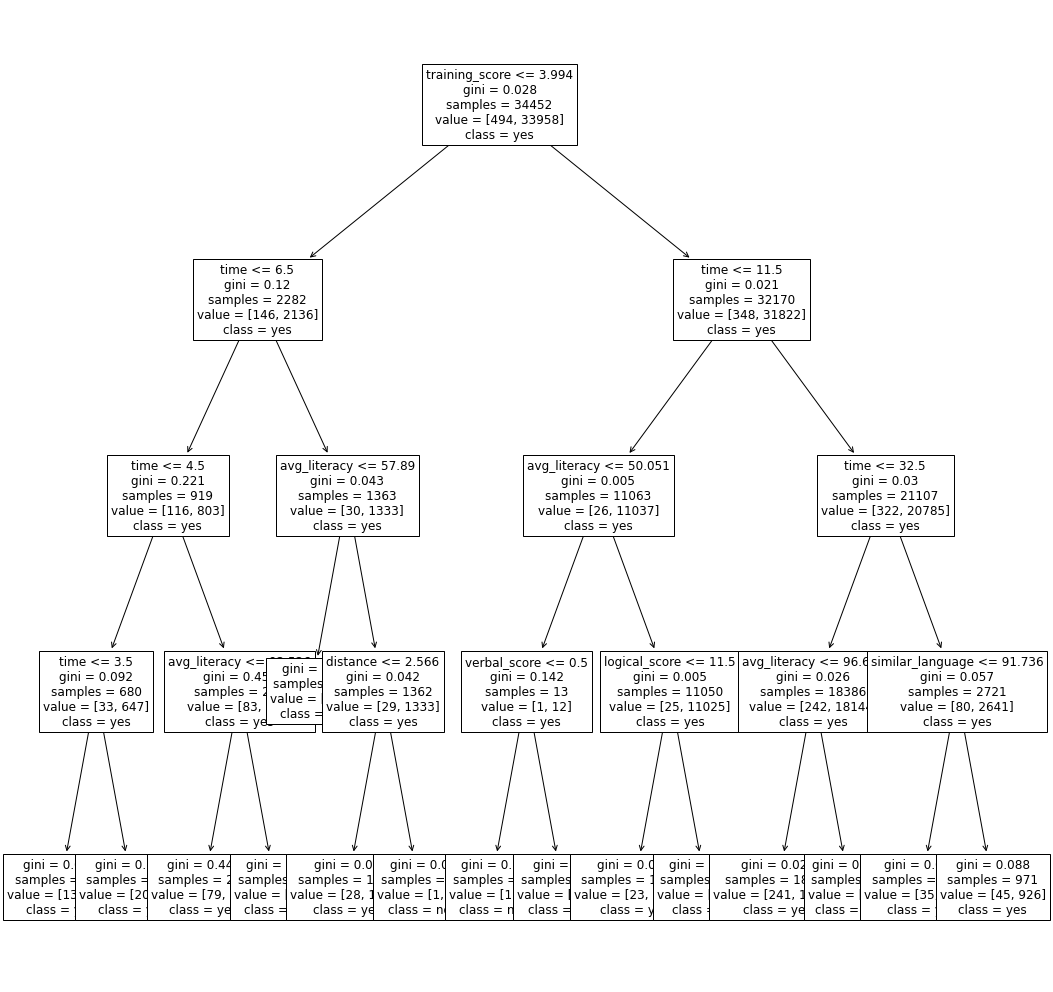

In [149]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(18, 18))
tree.plot_tree(d, feature_names=list(X_train.columns), fontsize=12,
              class_names=['no', 'yes']);

In [159]:
pred = clf_cv.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score

In [161]:
accuracy_score(pred,y_test)

0.982875386996904

In [107]:
y_test.describe()

count      10336
unique         2
top       Stayed
freq       10176
Name: turnover, dtype: object

In [108]:
10176/10336

0.9845201238390093

In [158]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [100,300,500,700,900], 'max_features': ['auto']}

clf_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1).fit(X_train,y_train)
clf_cv.best_estimator_

RandomForestClassifier()

In [153]:
rf = RandomForestClassifier(class_weight={'Stayed':1,'Left':5}, n_jobs=-1).fit(X_train,y_train)

In [154]:
pred = rf.predict(X_test)
accuracy_score(pred,y_test)

0.9825851393188855

In [155]:
from sklearn.metrics import confusion_matrix

In [162]:
confusion_matrix(pred,y_test)

array([[    0,    17],
       [  160, 10159]])

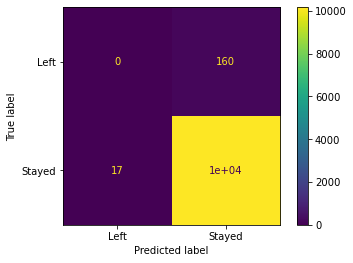

In [163]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_cv, X_test,y_test);

In [169]:
def plot_roc(y_predictions,y_true,name,pos_label):
    fpr,tpr,thresholds = roc_curve(y_true,y_predictions,pos_label=pos_label)
    roc_auc = auc(fpr, tpr)
    plt.title(name)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

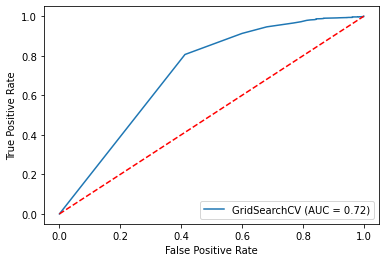

In [174]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf_cv, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [171]:
plot_roc(pred,y_test,"h", pos_label='1 Left')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [114]:
clf_cv.best_score_

0.9691463108208493

In [127]:
pred = clf_cv.predict(X_test)
accuracy_score(pred,y_test)

0.9847136222910217

In [128]:
confusion_matrix(pred,y_test)

array([[    2,     0],
       [  158, 10176]])

In [112]:
0.9847136222910217/0.9845201238390093

1.0001965408805031

In [183]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(X_train,y_train)

In [184]:
pred = log.predict(X_test)
accuracy_score(pred,y_test)

0.9845201238390093

In [176]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'criterion': ['entropy'],
               'max_depth': np.unique( np.exp(np.linspace(0, 10, 100)).astype(int) ),
               'min_samples_leaf': np.unique( np.exp(np.linspace(0, 8, 100)).astype(int) ),
               'max_features': [None,'auto','log2'],
               'min_impurity_decrease': np.exp(np.linspace(-9, -1, 100))}

rf_random_search = RandomizedSearchCV(estimator = RandomForestClassifier(n_estimators=100), 
                                      param_distributions = random_grid,
                                      random_state=345, n_iter = 100,
                                      scoring='neg_log_loss',n_jobs=-1,
                                      cv =10,return_train_score=True)
rf_random_search.fit(X=X_train,y=y_train)
rf_random_search.best_params_

{'min_samples_leaf': 41,
 'min_impurity_decrease': 0.00048747935055342144,
 'max_features': None,
 'max_depth': 6,
 'criterion': 'entropy'}

In [177]:
rf = rf_random_search.best_estimator_

In [178]:
randomforest_test_pred = rf.predict_proba(X_test)[:,1]

In [179]:
test_loss_rf = log_loss(y_test.values,randomforest_test_pred)
print("Test Loss: %0.4f" % test_loss_rf)

Test Loss: 0.0713


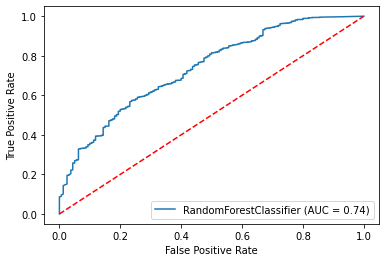

In [180]:
rf_disp = plot_roc_curve(rf, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

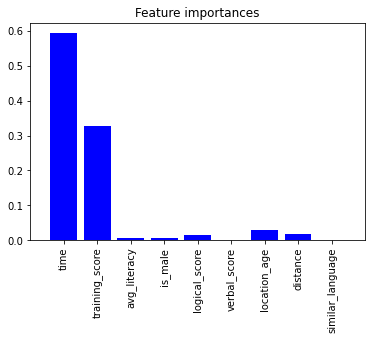

In [189]:
importances = rf.feature_importances_

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances,
       color="b", align="center")
plt.xticks(range(X.shape[1]), cols,rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [181]:
pred = rf.predict(X_test)
accuracy_score(pred,y_test)

0.9845201238390093

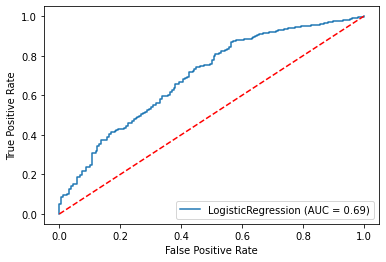

In [185]:
log_disp = plot_roc_curve(log, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

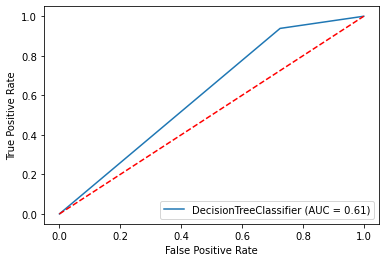

In [186]:
dt = DecisionTreeClassifier(max_depth=1).fit(X_train,y_train)
dt_disp = plot_roc_curve(dt, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

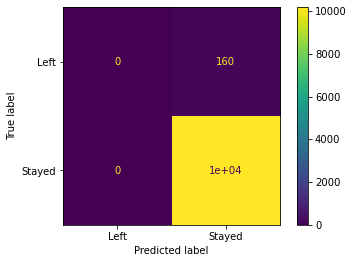

In [187]:
plot_confusion_matrix(rf, X_test,y_test);

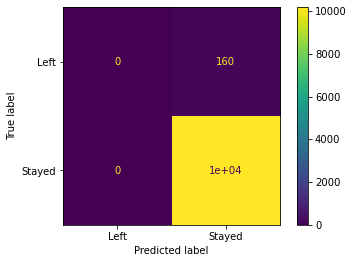

In [188]:
plot_confusion_matrix(log, X_test,y_test);